In [1]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import peakutils as pk
from peakutils.plot import plot as pplot
from scipy.interpolate import CubicSpline
import scipy.constants as const

In [2]:
data_file = "data/20170721-Ar-H-Torch.txt"

In [3]:
data = np.loadtxt(data_file, skiprows=14)

In [4]:
cal = np.loadtxt("suspect_calibration_data/CalibrationFile.txt")

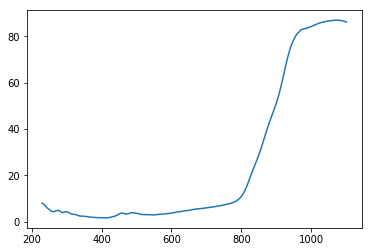

In [5]:
plt.plot(cal[:,0], cal[:,1])
#plt.plot(data[:,0], data[:,1])
plt.show()

In [6]:
cal.shape

(175, 2)

In [7]:
interp = CubicSpline(cal[:,0], cal[:,1])

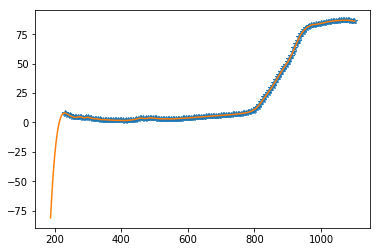

In [8]:
plt.plot(cal[:,0], cal[:,1], '*')
plt.plot(data[:,0], interp(data[:,0]))
plt.show()

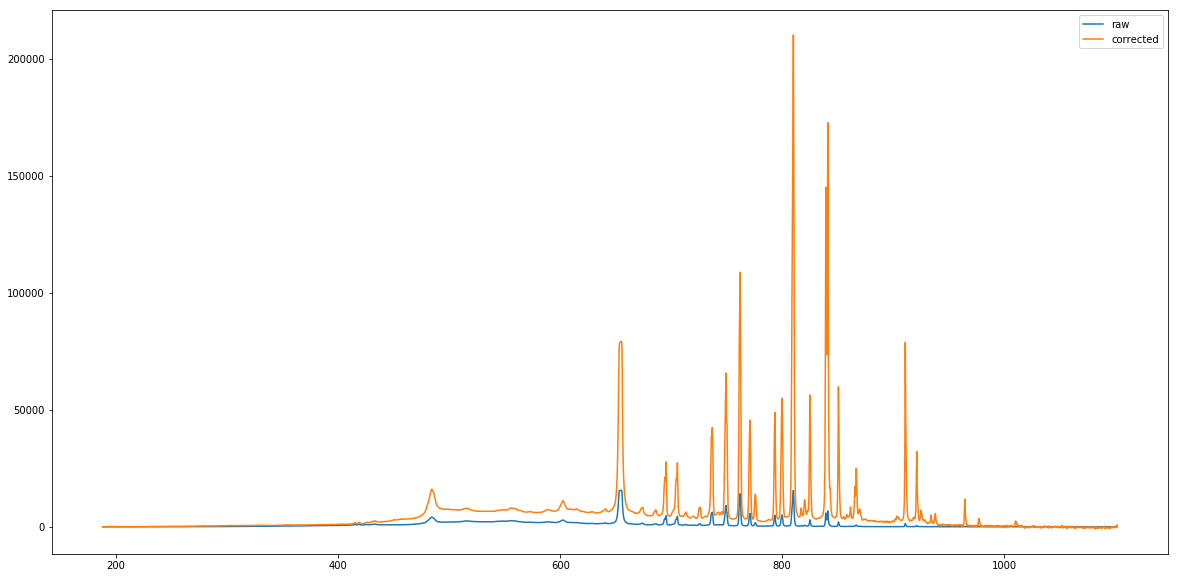

In [9]:
resampled_cal = np.column_stack((data[:,0], interp(data[:,0])))

f = plt.figure(figsize=(20,10))

plt.plot(data[:,0], data[:,1], label="raw")
plt.plot(data[:,0], np.multiply(data[:,1], resampled_cal[:,1]), label="corrected")
plt.legend(loc="upper right")
plt.show()

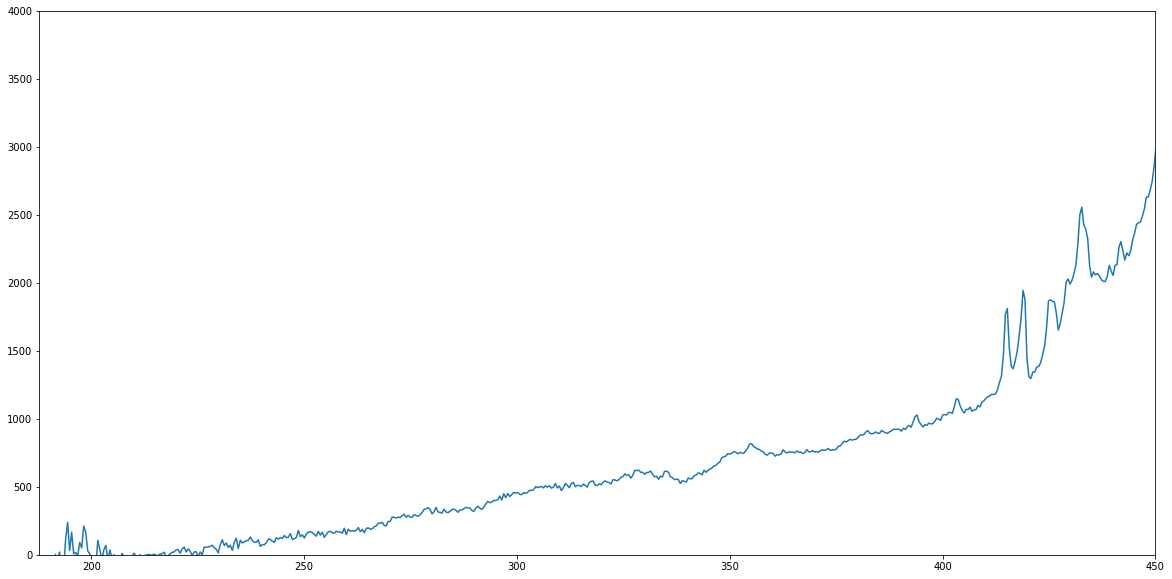

In [10]:
cdata = np.column_stack((data[:,0], np.multiply(data[:,1], interp(data[:,0]))))

f = plt.figure(figsize=(20,10))

plt.plot(cdata[:,0], cdata[:,1])

plt.xlim(np.min(cdata[:,0]), 450)
plt.ylim(0, 4000)

plt.show()

In [11]:
def black_body(temperature, wavelength):
    h = const.Planck
    c = const.c
    k = const.Boltzmann
    
    l = wavelength
    
    numerator = 2 * h * c ** 2 / l ** 5
    denominator = np.exp(h * c / (l * k * temperature)) - 1
    
    return numerator / denominator

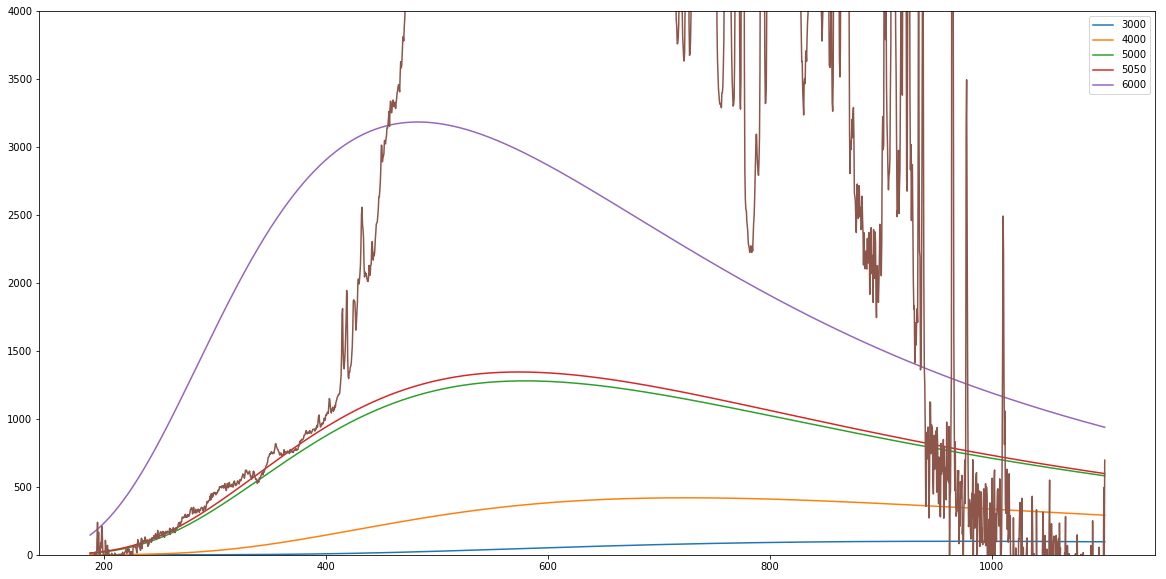

In [12]:
plt.figure(figsize=(20,10))

temperatures = [3000, 4000, 5000, 5050, 6000]
for t in temperatures:
    plt.plot(cdata[:,0], black_body(t, cdata[:,0] * 1e-9) * 1e-10, label=t)
    
plt.plot(cdata[:,0], cdata[:,1])

#plt.xlim(175, 450)
plt.ylim(0, 4000)

plt.legend(loc="upper right")
plt.show()

# Let's find the peaks

In [16]:
cal[-1]

array([1100.    ,   86.1704])

In [17]:
data.shape

(2048, 2)

In [18]:
data[-1,:]

array([1101.758,    8.09 ])

In [19]:
cal.shape

(175, 2)

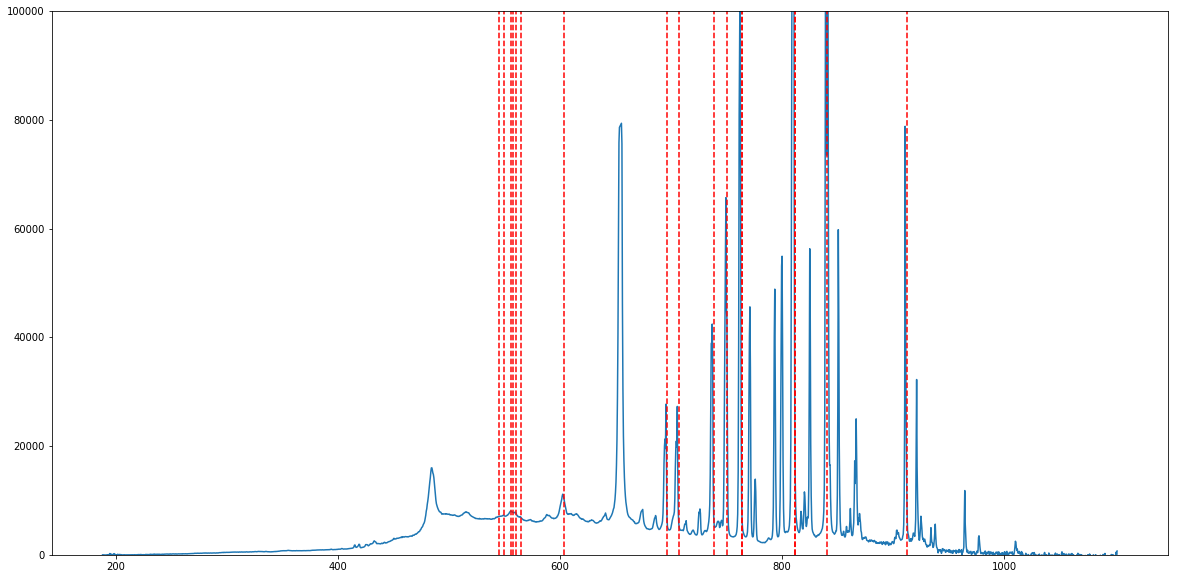

In [20]:
plt.figure(1, figsize=(20,10))

plt.plot(cdata[:,0], cdata[:,1])

ar_lines = [
    545.16,
    549.58,
    555.87,
    557.25,
    560.67,
    565.07,
    811.5311,
    763.5105,
    811.5311,
    763.5105,
    750.3869,
    738.3980,
    706.7217,
    696.5430,
    840.8209,
    603.2127,
    912.2967
]

for line in ar_lines:
    plt.axvline(x=line, linestyle='--', color='red')

# plt.xlim(500, 920)
plt.ylim(0, 100000)

plt.show()

In [25]:
cal_light_measured_file = "suspect_calibration_data/DH-3PlusCalLight-DeuteriumHalogen_HRD10391_13-38-36-901.txt"
cal_light_measured_data = np.loadtxt(cal_light_file, skiprows=14)
cal_light_true_file = "suspect_calibration_data/"

In [26]:
cal_light_measured_data.shape

(2048, 2)

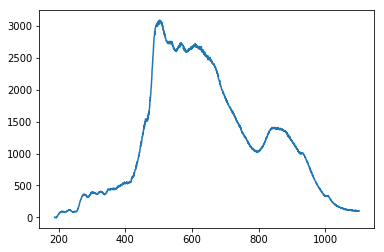

In [28]:
plt.plot(cal_light_measured_data[:,0], cal_light_measured_data[:,1])
plt.show()